In [9]:
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

def show(img):
    plt.imshow(F.to_pil_image(img))
    plt.xticks([])
    plt.yticks([])

In [10]:
from lpl.transform import make_simclr_transforms
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor

multiple_transform = make_simclr_transforms(0.5, 0.0, 32)

cifar_ds = CIFAR10(root='../datasets/', transform=ToTensor())

In [11]:
n = 100
sample = cifar_ds[n][0]

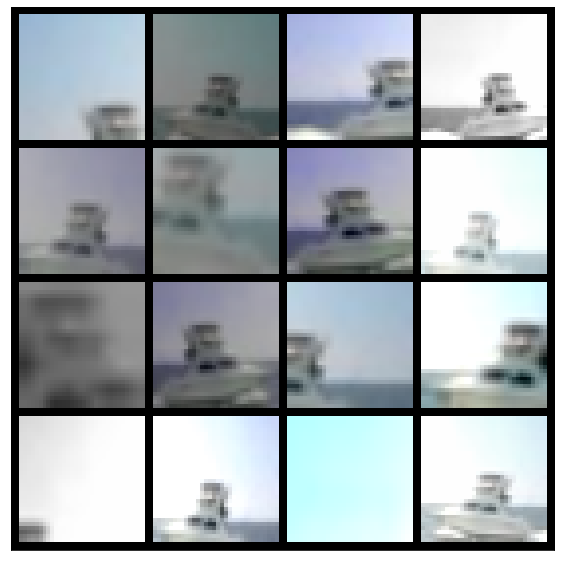

In [12]:
from torchvision.utils import make_grid

imglist = [multiple_transform(sample) for _ in range(16)]
grid = make_grid(imglist, nrow=4)

plt.figure(figsize=(10, 10))
show(grid)

# As in training

In [13]:
import torchvision
import torch
from lpl.transform import make_simclr_transforms, DoubleTransformDataset

contrastive_transform = make_simclr_transforms(
    jitter_strength=0.5, blur=0.5, img_size=96)

ds = torchvision.datasets.STL10(
    root='../datasets/',
    transform=torchvision.transforms.ToTensor(),
    split='unlabeled'
)
ds = DoubleTransformDataset(ds, contrastive_transform)
dl = torch.utils.data.DataLoader(ds, batch_size=16, num_workers=1, shuffle=True)

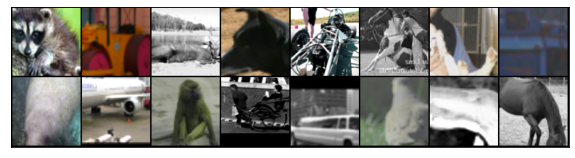

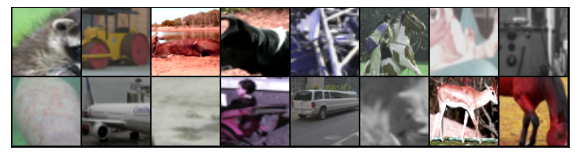

In [15]:
for img1, img2, label in dl:
    grid = make_grid(img1)
    plt.figure(figsize=(10, 10))
    show(grid)

    grid = make_grid(img2)
    plt.figure(figsize=(10, 10))
    show(grid)
    break